In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
plt.style.use('ggplot')


In [ ]:
df=pd.read_csv('/content/7817_1.csv')

In [ ]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [ ]:
# df=df.head(500)

In [ ]:
max_length = df['reviews.text'].str.len().max()
print(max_length)

19739


In [ ]:
print(df.shape)

(500, 27)


## EDA

In [ ]:
df['reviews.rating'].value_counts()

,count
reviews.rating,
5.0,174
4.0,53
3.0,33
1.0,15
2.0,11


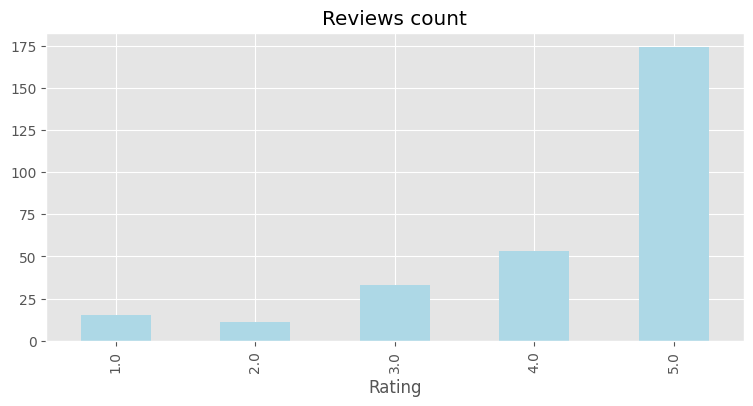

In [ ]:
ax=df['reviews.rating'].value_counts().sort_index().plot(kind='bar',title="Reviews count",
                                         color='lightblue',
                                         figsize=(9,4))
ax.set_xlabel('Rating')
plt.show()

In [ ]:
from random import randint
ind=randint(0,len(df))
example=df['reviews.text'][ind]

In [ ]:
print(example)

If you're reading reviews of the new 3rd generation Paperwhite, you're likely considering buying one. If so, you're probably in one of these categories:* Never owned a Kindle e-ink reader* Own an older Kindle e-ink reader, but not a Paperwhite* Own a first or second generation PaperwhiteI'll save my opinion on whether the new Paperwhite 3 is worth buying until the end of my review. (But I will say this: They've taken a great product and made it even better.) First, here's a comparison of the new Paperwhite with the second generation Paperwhite (comparisons are for the wi-fi models):Second Generation Paperwhite (2013)-------------------------------------------Size: 6.7x4.6x0.36Weight (wi-fi version): 7.3 ouncesDisplay: 6 diagonal, 212 pixels per inch, 16-level grayscale, LED frontlitStorage memory: 4GBPage turns: TouchscreenNumber of fonts: 6Display lighting: Manually adjustable front-lightingAll-New Paperwhite (2015)------------------------------Size: 6.7x4.6x0.36Weight (wi-fi version)

## Using Transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL="cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
tokens=tokenizer(example,padding=True,truncation=True,max_length=max_length,return_tensors='pt')
output=model(**tokens)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict={
    'Negative':scores[0],
    'Neutral':scores[1],
    'Positive':scores[2]
}
print(scores_dict)


{'Negative': 0.09007029, 'Neutral': 0.44923404, 'Positive': 0.46069574}


In [ ]:
def polarity_scores(ex):
  tokens=tokenizer(ex,padding=True,truncation=True,max_length=max_length,return_tensors='pt')
  output=model(**tokens)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={
      'Negative':scores[0],
      'Neutral':scores[1],
      'Positive':scores[2]
  }
  return scores_dict

In [ ]:
from tqdm import tqdm

In [ ]:
results={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  try:
    text=row['reviews.text']
    myid=row['id']
    results[myid]=polarity_scores(text)
  except:
    print(f'error at {i}')

  3%|▎         | 14/500 [00:07<03:01,  2.67it/s]

error at 14


  8%|▊         | 40/500 [00:23<03:32,  2.16it/s]

error at 40


 68%|██████▊   | 342/500 [03:24<00:58,  2.70it/s]

error at 343


 69%|██████▉   | 347/500 [03:25<00:32,  4.70it/s]

error at 347


 70%|███████   | 351/500 [03:26<00:26,  5.60it/s]

error at 349


 71%|███████   | 354/500 [03:26<00:27,  5.40it/s]

error at 354


 72%|███████▏  | 358/500 [03:27<00:28,  4.92it/s]

error at 358
error at 359
error at 360


 72%|███████▏  | 362/500 [03:28<00:28,  4.89it/s]

error at 362


 74%|███████▍  | 372/500 [03:30<00:18,  6.84it/s]

error at 370


 77%|███████▋  | 383/500 [03:34<00:53,  2.19it/s]

error at 383


 77%|███████▋  | 387/500 [03:35<00:47,  2.39it/s]

error at 387
error at 388
error at 389


 79%|███████▊  | 393/500 [03:36<00:24,  4.29it/s]

error at 393


 80%|███████▉  | 398/500 [03:37<00:16,  6.25it/s]

error at 396


 82%|████████▏ | 409/500 [03:39<00:15,  5.71it/s]

error at 407


 84%|████████▍ | 420/500 [03:41<00:14,  5.62it/s]

error at 418


 84%|████████▍ | 421/500 [03:43<00:32,  2.39it/s]

error at 421


 86%|████████▌ | 428/500 [03:44<00:15,  4.59it/s]

error at 426


 86%|████████▋ | 432/500 [03:46<00:22,  2.99it/s]

error at 430


 89%|████████▊ | 443/500 [03:49<00:11,  4.86it/s]

error at 441


 89%|████████▉ | 444/500 [03:49<00:10,  5.34it/s]

error at 444


 90%|████████▉ | 449/500 [03:50<00:12,  4.04it/s]

error at 449
error at 450


100%|██████████| 500/500 [04:00<00:00,  2.08it/s]


In [ ]:
print(len(results.keys()))

37


In [ ]:
results_df=pd.DataFrame(results).T
results_df=results_df.reset_index().rename(columns={'index':'id'})
results_df=results_df.merge(df,how='left')

In [ ]:
results_df.isnull().sum()

,0
id,0
Negative,0
Neutral,0
Positive,0
asins,0
brand,0
categories,0
colors,500
dateAdded,0
dateUpdated,0


In [ ]:
results_df.head()

,id,Negative,Neutral,Positive,asins,brand,categories,colors,dateAdded,dateUpdated,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,0.001471,0.008975,0.989554,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,0.001471,0.008975,0.989554,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,0.001471,0.008975,0.989554,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,0.001471,0.008975,0.989554,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,0.001471,0.008975,0.989554,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [ ]:
print(results_df.shape)
print(df.shape)

(500, 30)
(500, 27)


## Using inbuilt Transformers Pipelines

In [ ]:
from transformers import pipeline

# Load the sentiment analysis pipeline
import torch

# Check if a GPU is available and set the device accordingly
device = 0 if torch.cuda.is_available() else -1

# Load the sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", device=device,truncation=True)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
results = sentiment_analyzer([example])
print(results,example)

[{'label': 'NEGATIVE', 'score': 0.9929088354110718}] If you're reading reviews of the new 3rd generation Paperwhite, you're likely considering buying one. If so, you're probably in one of these categories:* Never owned a Kindle e-ink reader* Own an older Kindle e-ink reader, but not a Paperwhite* Own a first or second generation PaperwhiteI'll save my opinion on whether the new Paperwhite 3 is worth buying until the end of my review. (But I will say this: They've taken a great product and made it even better.) First, here's a comparison of the new Paperwhite with the second generation Paperwhite (comparisons are for the wi-fi models):Second Generation Paperwhite (2013)-------------------------------------------Size: 6.7x4.6x0.36Weight (wi-fi version): 7.3 ouncesDisplay: 6 diagonal, 212 pixels per inch, 16-level grayscale, LED frontlitStorage memory: 4GBPage turns: TouchscreenNumber of fonts: 6Display lighting: Manually adjustable front-lightingAll-New Paperwhite (2015)-----------------

In [ ]:
extext=df['reviews.text'][9]
print(sentiment_analyzer(extext))

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


[{'label': 'POSITIVE', 'score': 0.9980818033218384}]


In [ ]:
pipeline_results={}

In [ ]:
import logging

logging.basicConfig(filename='errors.log', level=logging.ERROR)

for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['reviews.text']
        myid = row['id']
        pipeline_results[myid] = sentiment_analyzer(text)[0]
    except Exception as e:
        logging.error(f'Error at index {i} (ID: {myid}): {e}')
        skipped_ids.append(myid)

100%|██████████| 1597/1597 [00:15<00:00, 102.76it/s]


In [ ]:
print(len(pipeline_results.keys()))

66


In [ ]:
pipeline_results_df=pd.DataFrame(pipeline_results).T
pipeline_results_df=pipeline_results_df.reset_index().rename(columns={'index':'id'})
pipeline_results_df=pipeline_results_df.merge(df,how='left')

In [ ]:
pipeline_results_df.head()

,id,label,score,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpff7_VilAPnD_xc1E_,NEGATIVE,0.897022,B00DU15MU4,Amazon,"Categories,Amazon Devices,Streaming Media Players",NaN,2016-02-03T04:11:33Z,2017-08-08T22:03:27Z,NaN,...,NaN,http://www.amazon.com/Certified-Refurbished-Am...,"Having received my Fire TV today, I've been tr...",Works great with one critical flaw. (significa...,NaN,NaN,Gregory P. Baker,NaN,8.487190e+11,NaN
1,AVpff7_VilAPnD_xc1E_,NEGATIVE,0.897022,B00DU15MU4,Amazon,"Categories,Amazon Devices,Streaming Media Players",NaN,2016-02-03T04:11:33Z,2017-08-08T22:03:27Z,NaN,...,NaN,http://www.amazon.com/Certified-Refurbished-Am...,I'm your typical middle-aged woman - I don't g...,"A review from a non-techie 11,059 people found...",NaN,NaN,Mandy,NaN,8.487190e+11,NaN
2,AVpff7_VilAPnD_xc1E_,NEGATIVE,0.897022,B00DU15MU4,Amazon,"Categories,Amazon Devices,Streaming Media Players",NaN,2016-02-03T04:11:33Z,2017-08-08T22:03:27Z,NaN,...,NaN,http://www.amazon.com/Certified-Refurbished-Am...,An Amazon.com official commented on this revie...,"I like it Amazon...But this is IMPORTANT 5,859...",NaN,NaN,Dallas,NaN,8.487190e+11,NaN
3,AVpff7_VilAPnD_xc1E_,NEGATIVE,0.897022,B00DU15MU4,Amazon,"Categories,Amazon Devices,Streaming Media Players",NaN,2016-02-03T04:11:33Z,2017-08-08T22:03:27Z,NaN,...,4.0,http://www.amazon.com/Certified-Refurbished-Am...,"Having received my Fire TV today, I've been tr...",Works great with one critical flaw. (significa...,NaN,NaN,Gregory P. Baker,NaN,8.487190e+11,NaN
4,AVpff7_VilAPnD_xc1E_,NEGATIVE,0.897022,B00DU15MU4,Amazon,"Categories,Amazon Devices,Streaming Media Players",NaN,2016-02-03T04:11:33Z,2017-08-08T22:03:27Z,NaN,...,NaN,http://www.amazon.com/Certified-Refurbished-Am...,I'm your typical middle-aged woman - I don't g...,"A review from a non-techie 11,064 people found...",NaN,NaN,Mandy,NaN,8.487190e+11,NaN


In [ ]:
print(pipeline_results_df.shape)

(1597, 29)


In [ ]:
pipeline_results_df['label'].value_counts()

,count
label,
POSITIVE,1028
NEGATIVE,569
